Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2018/2019
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 2: Linearni diskriminativni modeli

*Verzija: 1.2  
Zadnji put ažurirano: 26. listopada 2018.*

(c) 2015-2018 Jan Šnajder, Domagoj Alagić  

Objavljeno: **26. listopada 2018.**  
Rok za predaju: **5. studenog 2018. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import sklearn
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Linearna regresija kao klasifikator

U prvoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za negativne primjere predviđa vrijednost $1$, dok za pozitivne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dostupna u pomoćnom paketu `mlutils` (datoteku `mlutils.py` možete preuzeti sa stranice kolegija). `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.


In [2]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

#### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [3]:
seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

[[-0.5 -0.1]]
[2.1]
1.0


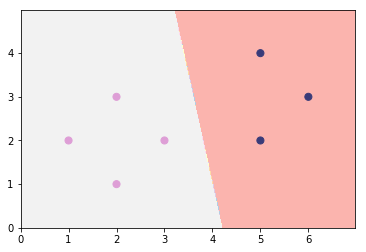

In [4]:
# Vaš kôd ovdje...

model = RidgeClassifier(alpha = 0).fit(seven_X, seven_y)
print(model.coef_)
print(model.intercept_)
h = model.predict(seven_X)
acc = accuracy_score(seven_y, h)
print(acc)
mlutils.plot_2d_clf_problem(seven_X,seven_y,model.predict)

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

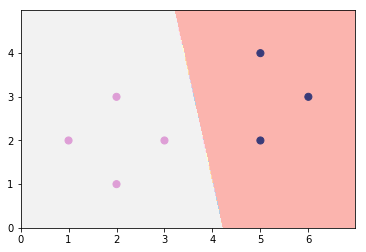

In [5]:
# Vaš kôd ovdje...
lr_model = LinearRegression().fit(seven_X,seven_y)
mlutils.plot_2d_clf_problem(seven_X,seven_y,lambda x : lr_model.predict(x) >= 0.5)


**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

#### (b)

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [6]:
outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, 0)

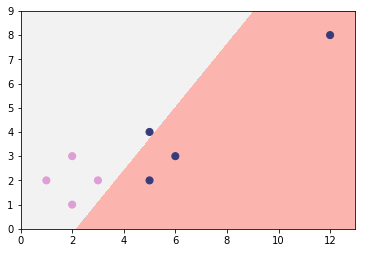

In [7]:
# Vaš kôd ovdje...

model.fit(outlier_X,outlier_y)
mlutils.plot_2d_clf_problem(outlier_X,outlier_y, model.predict)

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

#### (c)

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [8]:
unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, 0)

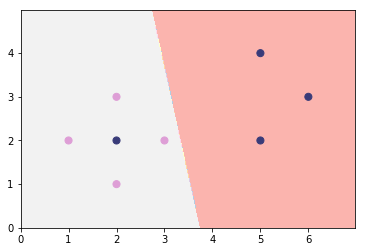

In [9]:
# Vaš kôd ovdje...

model.fit(unsep_X,unsep_y)
mlutils.plot_2d_clf_problem(unsep_X,unsep_y, model.predict)

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

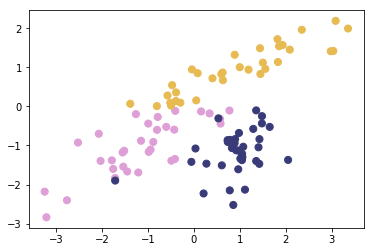

In [10]:
from sklearn.datasets import make_classification

# Vaš kôd ovdje...

X, y = make_classification(n_features=2, n_redundant=0, n_classes=3, n_clusters_per_class=1)
mlutils.plot_2d_clf_problem(X, y, h=None)

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

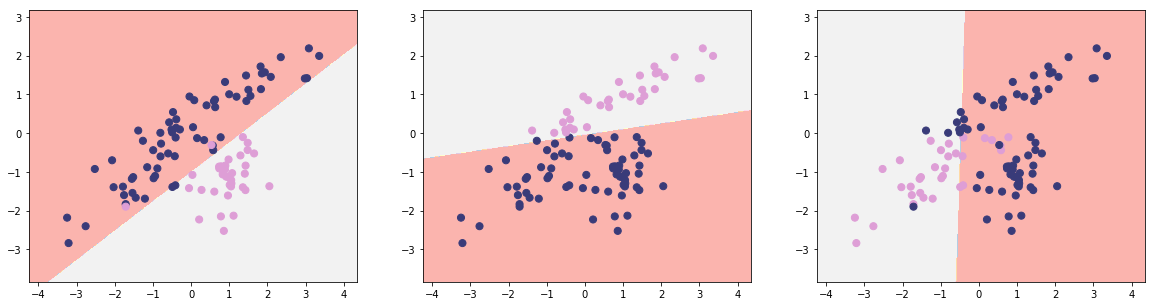

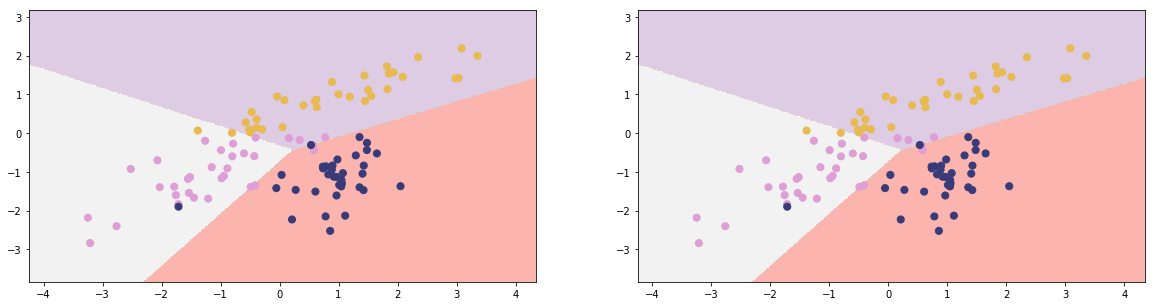

In [11]:
# Vaš kôd ovdje...

y1, y2, y3 = [], [], []

for i in y:
    if i == 0:
        y1.append(1)
        y2.append(0)
        y3.append(0)
    elif i==1:
        y1.append(0)
        y2.append(1)
        y3.append(0)
    elif i==2:
        y1.append(0)
        y2.append(0)
        y3.append(1)

h1 = RidgeClassifier(alpha = 0).fit(X, y1)
h2 = RidgeClassifier(alpha = 0).fit(X, y2)
h3 = RidgeClassifier(alpha = 0).fit(X, y3)

h4 = LinearRegression().fit(X, y1)
h5 = LinearRegression().fit(X, y2)
h6 = LinearRegression().fit(X, y3)


plt.figure(figsize= (20, 5))
subplot(1,3,1)
mlutils.plot_2d_clf_problem(X,y1,h1.predict)
subplot(1,3,2)
mlutils.plot_2d_clf_problem(X,y2,h2.predict)
subplot(1,3,3)
mlutils.plot_2d_clf_problem(X,y3,h3.predict)

def predict(x):
    return argmax([h4.predict(x.reshape(1, -1)), h5.predict(x.reshape(1, -1)), h6.predict(x.reshape(1, -1))])


plt.figure(figsize= (20, 5))
subplot(1,2,1)
mlutils.plot_2d_clf_problem(X, y, predict)

reg2 = RidgeClassifier(alpha = 0).fit(X, y)
subplot(1, 2, 2)
mlutils.plot_2d_clf_problem(X, y, reg2.predict);

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

#### (a)

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

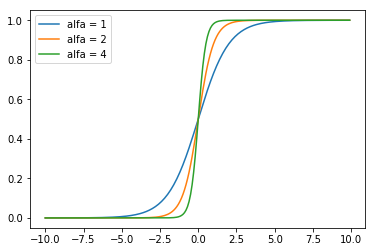

In [12]:
# Vaš kôd ovdje...
def sigm(x):
    return 1 / (1 + exp(-x))
x = np.arange(-10, 10, 0.1);
for a in [1,2,4]:
    plt.plot(x,sigm(a*x), label = "alfa = {}".format(a))
    plt.legend(loc="best")

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

#### (b)

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [13]:
# Vaš kôd ovdje...
def lr_h(x, w):
    x = np.insert(x, 0, 1)
    return sigm(x.dot(w)) 

def cross_entropy_error(X, y, w, alpha):
    sum = 0
    N = len(X)
    for i in range(N):
        sum += (y[i] * log(lr_h(X[i], w)) + (1-y[i]) * log(1 - lr_h(X[i], w)))
    sum = -sum
    #sum = sum / N
    #return sum + (alpha*np.dot(w.T,w))/2
    return sum

def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    n = X.shape[1]
    wt = np.zeros(n + 1)
    
    N = len(X)
    
    err_pre = cross_entropy_error(X, y, wt, alpha)
    w_trace = []
    for k in range(max_iter):
        dw0 = 0
        dw = zeros(shape(X)[1])
        err = 0
        for i in range(N):
            h = lr_h(X[i], wt)
            dw0 = dw0 + h - y[i]
            dw = dw + (h-y[i])*X[i]

        
        wt[0] = wt[0] - eta*dw0
        wt[1:] = wt[1:] * (1-eta*alpha) - eta*dw
        
        w_trace.append(wt.copy())
        
        err = cross_entropy_error(X,y,wt,alpha)
        if abs(err_pre - err) < epsilon:
            print("K = ", k)
            break
            
        else: 
            err_pre = err
            
    if trace:
        return wt, w_trace
    else:
        return wt

#### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

Pogreska:  0.542620277674479
[ 6.44150959 -2.11012128  0.53522851]


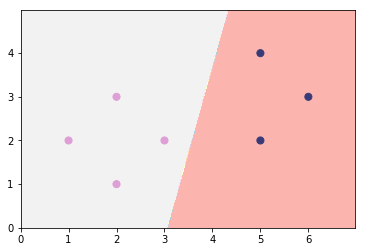

In [14]:
# Vaš kôd ovdje...
w3d = lr_train(seven_X, seven_y)
print("Pogreska: ", cross_entropy_error(seven_X, seven_y, w3d, 0))
print(w3d)

mlutils.plot_2d_clf_problem(seven_X, seven_y,lambda x: lr_h(x, w3d) > 0.5)

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

#### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

K =  1543
K =  1127


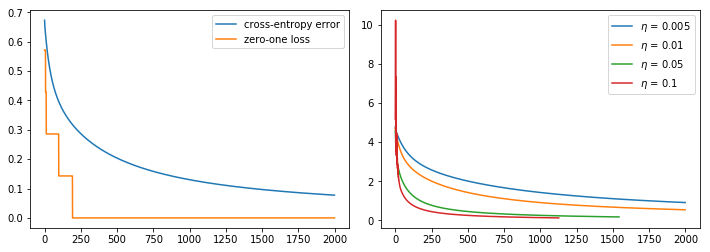

In [15]:
# Vaš kôd ovdje...
from sklearn.metrics import zero_one_loss

w,w_trace = lr_train(seven_X, seven_y, trace=True)


figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
subplot(1,2,1) 

cross_entropy_err = []
for i in range(len(w_trace)):
    cross_entropy_err.append(cross_entropy_error(seven_X, seven_y, w_trace[i],0)/len(seven_X))
plt.plot(cross_entropy_err, label = "cross-entropy error")


zero_one_err = []
for i in range(len(w_trace)):
    zero_one_err.append(zero_one_loss(seven_y, [ lr_h(x, w_trace[i]) > 0.5 for x in seven_X ]))
plt.plot(zero_one_err, label = "zero-one loss")
plt.legend(loc="best")

subplot(1,2,2) 
for i in [0.005, 0.01, 0.05, 0.1]:
    err = []
    w, w_trace = lr_train(seven_X, seven_y, i, trace=True)
    
    for j in range(0, len(w_trace)):
        err.append(cross_entropy_error(seven_X, seven_y, w_trace[j], 0))
    plt.plot(err, label = "$\eta$ = " + str(i))

plt.legend(loc="best")


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

#### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

/home/marin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


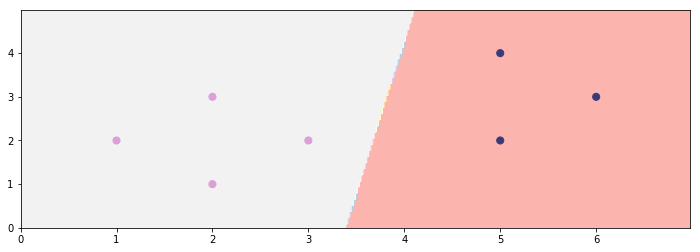

In [16]:
from sklearn.linear_model import LogisticRegression

# Vaš kôd ovdje...
lr = LogisticRegression(max_iter=2000, tol=0.0001, C=0.01**-1).fit(seven_X,seven_y)
h = lambda x : lr.predict(x)
mlutils.plot_2d_clf_problem(seven_X, seven_y, h)

### 4. Analiza logističke regresije

#### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier` iz prvog zadatka. Prikažite granicu između klasa.

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

/home/marin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


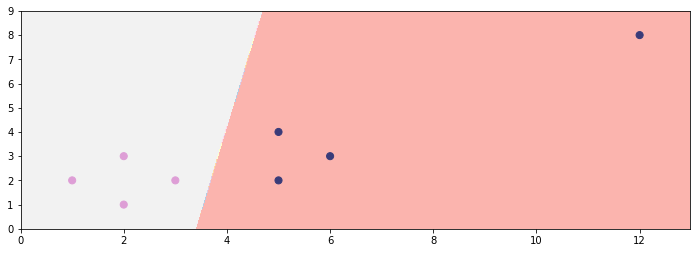

In [17]:
# Vaš kôd ovdje...
lr = LogisticRegression(max_iter=2000, tol=0.0001, C=0.01**-1).fit(outlier_X,outlier_y)
h = lambda x : lr.predict(x)

mlutils.plot_2d_clf_problem(outlier_X,outlier_y, h)

#### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.


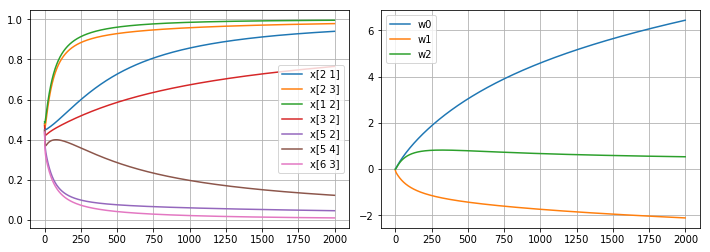

In [18]:
# Vaš kôd ovdje...
w, w_trace = lr_train(seven_X, seven_y, trace=True)


w0 = []
w1 = []
w2 = []
for i in range(0, len(w_trace)):
    w0.append(w_trace[i][0])
    w1.append(w_trace[i][1])
    w2.append(w_trace[i][2])

figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
subplot(1,2,1)   
grid()
for x in seven_X:
    hx = []
    for i in range(len(w_trace)):
        hx.append(lr_h(x,w_trace[i]))
    plot(hx, label = "x{}".format(x))
legend(loc="best")
    
subplot(1,2,2)   
grid()
plot(w0, label = "w0")
plot(w1, label = "w1")
plot(w2, label = "w2")
legend(loc="best")
    

#### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep` iz prvog zadatka.

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

K =  1314


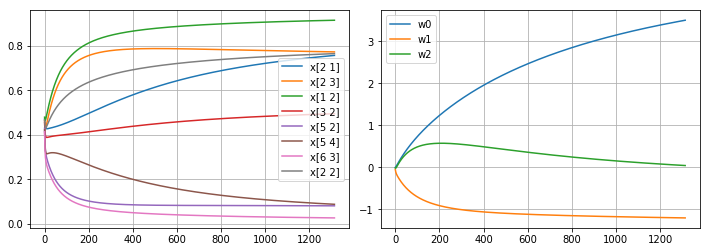

In [19]:
# Vaš kôd ovdje...
w, w_trace = lr_train(unsep_X, unsep_y, trace=True)


w0 = []
w1 = []
w2 = []
for i in range(0, len(w_trace)):
    w0.append(w_trace[i][0])
    w1.append(w_trace[i][1])
    w2.append(w_trace[i][2])

figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
subplot(1,2,1)   
grid()
for x in unsep_X:
    hx = []
    for i in range(0, len(w_trace)):
        hx.append(lr_h(x,w_trace[i]))
    plot(hx, label = "x{}".format(x))
legend(loc="best")
    
subplot(1,2,2)   
grid()
plot(w0, label = "w0")
plot(w1, label = "w1")
plot(w2, label = "w2")
legend(loc="best")
    

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

In [20]:
from numpy.linalg import norm

K =  771
K =  229
K =  771
K =  229


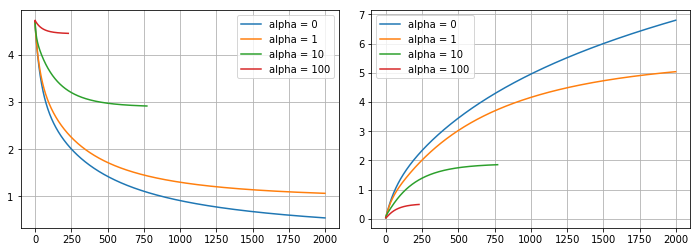

In [21]:
# Vaš kôd ovdje...
figure(figsize(12, 4))
subplots_adjust(wspace=0.1)
subplot(1,2,1)
grid()
for a in [0,1,10,100]:
    w, w_trace = lr_train(seven_X, seven_y, alpha=a, trace=True)
    cross_entropy_err = []
    for i in range(0, len(w_trace)):
        cross_entropy_err.append(cross_entropy_error(seven_X, seven_y, w_trace[i], a))
    plot(cross_entropy_err, label = "alpha = {}".format(a))
legend(loc="best")
subplot(1,2,2)
grid()
for a in [0,1,10,100]:
    w, w_trace = lr_train(seven_X, seven_y, alpha=a, trace=True)
    l2_norm = []
    for i in range(0, len(w_trace)):
        l2_norm.append(linalg.norm(w_trace[i]))
    plot(l2_norm, label = "alpha = {}".format(a))
legend(loc="best")


### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [22]:
from sklearn.preprocessing import PolynomialFeatures

#poly = PolynomialFeatures(2)
#...
#mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x))

/home/marin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marin/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


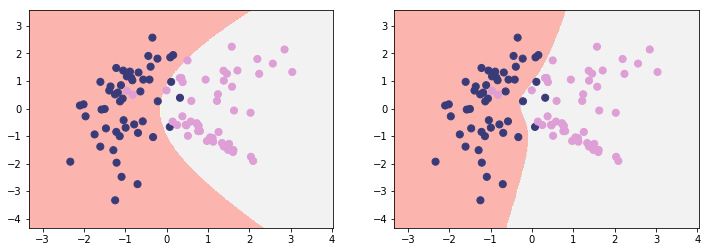

In [23]:
# Vaš kôd ovdje...
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2)
mlutils.plot_2d_clf_problem(X, y)
br = 1
for i in [2, 3]:
    subplot(1, 2, br)
    poly = PolynomialFeatures(i)
    Phi = poly.fit_transform(X)
    
    model = LogisticRegression().fit(Phi, y)
    h = lambda x : model.predict(poly.transform(x))
    mlutils.plot_2d_clf_problem(X, y, lambda x : model.predict(poly.transform(x)))
    br=2

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?